In [1]:
import glob

In [4]:
%matplotlib inline

In [10]:
names = glob.glob("./data/submissions/lgb035*.csv")
names += glob.glob("./data/submissions/lgb044*.csv")
names += glob.glob("./data/submissions/lgb045*.csv")

In [14]:
[name.split("\\")[-1].split(".")[0] for name in names]

['lgb035_gbdt',
 'lgb044_135_gbdt',
 'lgb044_233_gbdt',
 'lgb044_666_gbdt',
 'lgb044_67373_gbdt',
 'lgb044_677_gbdt',
 'lgb044_67_gbdt',
 'lgb044_688_gbdt',
 'lgb044_699_gbdt',
 'lgb044_6_gbdt',
 'lgb045_16_gbdt',
 'lgb045_267_gbdt',
 'lgb045_3677_gbdt',
 'lgb045_467373_gbdt',
 'lgb045_5666_gbdt',
 'lgb045_6688_gbdt',
 'lgb045_7699_gbdt',
 'lgb045_8233_gbdt',
 'lgb045_9135_gbdt']

In [15]:
from data_io import load_submission

In [17]:
subs = [load_submission(name) for name in [name.split("\\")[-1].split(".")[0] for name in names]]

In [18]:
submission = subs[0]

In [19]:
submission.head()

,card_id,target
0,C_ID_0ab67a22ab,-2.565551
1,C_ID_130fd0cbdd,-0.122060
2,C_ID_b709037bc5,-0.933452
3,C_ID_d27d835a9f,-0.175627
4,C_ID_2b5e3df5c2,-0.833884


In [20]:
for sub in subs[1:]:
    submission.target += sub.target

In [21]:
submission.head()

,card_id,target
0,C_ID_0ab67a22ab,-43.302063
1,C_ID_130fd0cbdd,-2.075735
2,C_ID_b709037bc5,-17.724479
3,C_ID_d27d835a9f,-3.484107
4,C_ID_2b5e3df5c2,-15.838680


In [22]:
submission["target"] /= len(subs)

In [23]:
submission.head()

,card_id,target
0,C_ID_0ab67a22ab,-2.279056
1,C_ID_130fd0cbdd,-0.109249
2,C_ID_b709037bc5,-0.932867
3,C_ID_d27d835a9f,-0.183374
4,C_ID_2b5e3df5c2,-0.833615


In [24]:
submission.to_csv("./data/submissions/blend-notebook039.csv", index=False)

# public blend

In [28]:
submission_pub.head()

,card_id,target
0,C_ID_0ab67a22ab,-2.795320
1,C_ID_130fd0cbdd,-0.258013
2,C_ID_b709037bc5,-0.995384
3,C_ID_d27d835a9f,-0.162522
4,C_ID_2b5e3df5c2,-1.179420


In [27]:
submission_my.head()

,card_id,target
0,C_ID_0ab67a22ab,-2.623687
1,C_ID_130fd0cbdd,-0.131720
2,C_ID_b709037bc5,-0.951725
3,C_ID_d27d835a9f,-0.209635
4,C_ID_2b5e3df5c2,-0.951078


In [32]:
submission_my = load_submission("stacking036")
submission_pub = load_submission("blend029p")
submission_my.target = submission_my.target * 0.5 + submission_pub.target * 0.5
submission_my.to_csv("./data/submissions/blend-notebook039p-55.csv", index=False)

In [31]:
submission_my.to_csv("./data/submissions/blend-notebook039p.csv", index=False)

In [33]:
submission_pub2 = load_submission("subm_3.651336_XGB_cv11_2019-02-15-11-56")

In [34]:
submission_my = load_submission("stacking036")
submission_pub = load_submission("blend029p")
submission_pub2 = load_submission("subm_3.651336_XGB_cv11_2019-02-15-11-56")
submission_my.target = submission_my.target * 0.5 + submission_pub.target * 0.5
submission_my.target = submission_my.target * .9 + submission_pub2.target * .1

In [36]:
submission_my.to_csv("./data/submissions/blend-notebook039p-55-91.csv", index=False)

In [2]:
from data_io import load_submission

submission_my = load_submission("stacking036")
submission_pub = load_submission("blend029p")
submission_pub2 = load_submission("subm_3.651336_XGB_cv11_2019-02-15-11-56")

In [12]:
for sub in (submission_my, submission_pub, submission_pub2):
    cond = sub.target < -10
    print(cond.sum(), sub[cond].target.mean())

254 -12.050863143795445
209 -11.919972067240584
265 -12.626336965839002


In [13]:
cond_join = (submission_my.target < -10) & (submission_pub.target < -10) & (submission_pub2.target < -10)
print(cond_join.sum())

162


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027CE231F978>]],
      dtype=object)

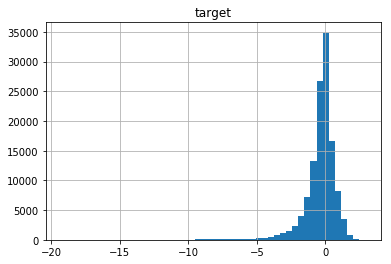

In [6]:
submission_my.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027CE2AAE2B0>]],
      dtype=object)

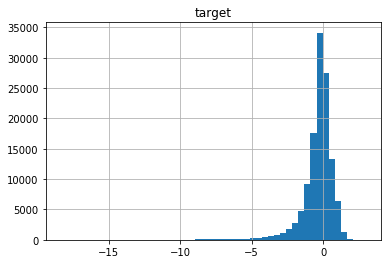

In [7]:
submission_pub.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027CE310E2B0>]],
      dtype=object)

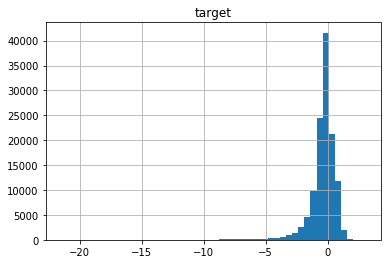

In [8]:
submission_pub2.hist(bins=50)

In [19]:
submission_my = load_submission("stacking036")
submission_pub = load_submission("blend029p")
submission_pub2 = load_submission("subm_3.651336_XGB_cv11_2019-02-15-11-56")

cond_join = (submission_my.target < -10) & (submission_pub.target < -10) & (submission_pub2.target < -10)
print(cond_join.sum())

submission_final_blend = load_submission("blend-notebook039p-55-91")
submission_final_blend.loc[cond_join, "target"] = -16.6
submission_final_blend.to_csv("./data/submissions/blend-notebook039p-55-91-post.csv", index=False)

162


In [20]:
submission_my = load_submission("stacking036")
submission_pub = load_submission("blend029p")
submission_pub2 = load_submission("subm_3.651336_XGB_cv11_2019-02-15-11-56")

cond_join = (submission_my.target < -10) & (submission_pub.target < -10) & (submission_pub2.target < -10)
print(cond_join.sum())

submission_final_blend = load_submission("blend-notebook039p-55-91")
submission_final_blend.loc[cond_join, "target"] = -20
submission_final_blend.to_csv("./data/submissions/blend-notebook039p-55-91-post20.csv", index=False)

162


In [21]:
submission_my = load_submission("stacking036")
submission_pub = load_submission("blend029p")
submission_pub2 = load_submission("subm_3.651336_XGB_cv11_2019-02-15-11-56")

cond_join = (submission_my.target < -10) & (submission_pub.target < -10) & (submission_pub2.target < -10)
print(cond_join.sum())

submission_final_blend = load_submission("blend-notebook039p-55-91")
submission_final_blend.loc[cond_join, "target"] = -23
submission_final_blend.to_csv("./data/submissions/blend-notebook039p-55-91-post23.csv", index=False)

162


In [22]:
submission_my = load_submission("stacking036")
submission_pub = load_submission("blend029p")
submission_pub2 = load_submission("subm_3.651336_XGB_cv11_2019-02-15-11-56")

cond_join = (submission_my.target < -10) & (submission_pub.target < -10) & (submission_pub2.target < -10)
print(cond_join.sum())

submission_final_blend = load_submission("blend-notebook039p-55-91")
submission_final_blend.loc[cond_join, "target"] = -19.4
submission_final_blend.to_csv("./data/submissions/blend-notebook039p-55-91-post19.csv", index=False)

162


In [23]:
submission_final = load_submission("blend-notebook039p-55-91-post20")
submission_final.target.max()

2.8002023370596327

In [24]:
from data_io import load_train

train = load_train()
train.target.max()

17.965069